In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
df = pd.read_csv("/content/drive/MyDrive/A/Swiggy/swiggy.csv")

In [150]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
36571,0x27b0,JAPRES18DEL01,21,4.9,26.913987,75.752891,27.023987,75.862891,08-03-2022,18:15:00,18:30:00,conditions Stormy,Medium,2,Buffet,electric_scooter,1,No,Metropolitian,(min) 25
14656,0xafc2,VADRES07DEL03,21,4.8,0.000000,0.000000,0.090000,0.090000,18-03-2022,19:35:00,19:40:00,conditions Fog,Jam,0,Buffet,motorcycle,2,No,Urban,(min) 41
23704,0xc9c,MUMRES19DEL02,28,5,19.131141,72.813074,19.211140,72.893074,10-03-2022,18:40:00,18:45:00,conditions Sandstorms,Medium,0,Buffet,motorcycle,1,No,Urban,(min) 33
28462,0x8a6,BANGRES16DEL02,NaN,NaN,13.029198,77.570997,13.049198,77.590997,26-03-2022,NaN,10:40:00,conditions Sunny,Low,0,Meal,motorcycle,1,No,NaN,(min) 10
28659,0xdfc0,AURGRES15DEL03,22,4.7,19.878028,75.317475,19.968028,75.407475,18-02-2022,18:15:00,18:25:00,conditions Cloudy,Medium,2,Drinks,scooter,1,No,Metropolitian,(min) 25
1277,0xd12,PUNERES18DEL02,36,4.3,18.593481,73.785901,18.723481,73.915901,29-03-2022,21:45:00,21:55:00,conditions Windy,Jam,0,Meal,motorcycle,1,Yes,Metropolitian,(min) 44
44821,0x6ac6,SURRES11DEL01,36,4.8,21.157735,72.768778,21.167735,72.778778,09-03-2022,08:40:00,08:50:00,conditions Cloudy,Low,0,Buffet,motorcycle,0,No,Urban,(min) 24
36810,0xde54,DEHRES15DEL01,26,4.9,0.000000,0.000000,0.110000,0.110000,14-02-2022,22:50:00,23:00:00,conditions Sunny,Low,2,Snack,scooter,1,No,Metropolitian,(min) 27
31232,0x2199,COIMBRES09DEL02,28,4.7,11.008638,76.984311,11.058638,77.034311,01-03-2022,22:50:00,23:05:00,conditions Cloudy,Low,0,Snack,motorcycle,1,No,Metropolitian,(min) 22
44841,0xd1aa,GOARES16DEL03,32,4.7,15.498603,73.826911,15.558603,73.886911,13-02-2022,20:40:00,20:45:00,conditions Sandstorms,Jam,2,Drinks,motorcycle,1,No,Metropolitian,(min) 30


In [151]:
#shape of data
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 45593
Number of columns: 20


In [75]:
#data_type
(
    df.dtypes
    .rename('Data Type')
)

,Data Type
ID,object
Delivery_person_ID,object
Delivery_person_Age,object
Delivery_person_Ratings,object
Restaurant_latitude,float64
Restaurant_longitude,float64
Delivery_location_latitude,float64
Delivery_location_longitude,float64
Order_Date,object
Time_Orderd,object


In [76]:
#in 	Delivery_person_ID befor R stand for city name now creating new colunm name as city for example INDORES13DEL02--INDORE is city
df['city'] = df['Delivery_person_ID'].str.split('RES').str[0]

In [78]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),city
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,CHEN
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,...,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26,HYD
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,...,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40,RANCHI
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,...,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32,MYS
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,...,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34,HYD
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,...,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46,DEH


In [79]:
# Weatherconditions from this colunm i want remove all the thinks before space
df['Weatherconditions'] = df['Weatherconditions'].str.split(' ').str[1]

In [80]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),city
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,CHEN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [82]:
# # Standardize string columns
# df['Weatherconditions'] = df['Weatherconditions'].str.strip().str.lower()
# df['Road_traffic_density'] = df['Road_traffic_density'].str.strip().str.lower()

# # Display cleaned data summary
# print(df.info())

In [83]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),city
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,CHEN


In [84]:
# Time_taken(min) i wand reomve (min) from all the data
df['Time_taken(min)'] = df['Time_taken(min)'].str.split(' ').str[1]

In [85]:
df.sample(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),city
32376,0x36b1,PUNERES04DEL02,24,4.7,18.514210,73.838429,18.644210,73.968429,02-04-2022,22:00:00,...,Stormy,Jam,1,Meal,scooter,0,No,Urban,28,PUNE
32212,0x4ba5,MYSRES02DEL02,25,5,12.304569,76.643622,12.434569,76.773622,25-03-2022,21:25:00,...,Stormy,Jam,1,Meal,scooter,1,No,Metropolitian,18,MYS
37555,0xd091,KOLRES07DEL02,34,4.7,22.547186,88.350680,22.567186,88.370680,15-02-2022,08:35:00,...,Windy,Low,1,Meal,scooter,1,No,Metropolitian,29,KOL
11137,0x48e8,VADRES14DEL01,26,4.7,22.311603,73.165012,22.381603,73.235012,18-03-2022,19:10:00,...,Stormy,Jam,1,Drinks,motorcycle,1,No,Urban,19,VAD
30190,0x8f2b,SURRES14DEL02,38,3.8,21.157729,72.768726,21.237729,72.848726,04-03-2022,17:35:00,...,Stormy,Medium,2,Snack,electric_scooter,1,No,Urban,33,SUR
42140,0x202c,MYSRES07DEL01,21,4.6,12.325461,76.632278,12.395461,76.702278,20-03-2022,17:20:00,...,Windy,Medium,2,Buffet,scooter,1,No,Urban,26,MYS
23355,0x7991,RANCHIRES17DEL01,37,3.7,23.374878,85.335739,23.444878,85.405739,04-03-2022,21:20:00,...,Sunny,Jam,1,Buffet,motorcycle,1,No,Metropolitian,32,RANCHI
37245,0x37b5,PUNERES05DEL03,22,4.7,18.543626,73.905101,18.633626,73.995101,27-03-2022,18:50:00,...,Sunny,Medium,0,Meal,motorcycle,1,No,NaN,21,PUNE
23732,0x620e,JAPRES15DEL03,38,4.9,26.891191,75.802083,26.921191,75.832083,13-03-2022,18:40:00,...,Stormy,Medium,1,Drinks,motorcycle,0,No,Metropolitian,26,JAP
40078,0xc757,AGRRES17DEL03,38,4.8,27.157772,78.047250,27.247772,78.137250,16-02-2022,19:30:00,...,Fog,Jam,1,Buffet,motorcycle,3,No,Metropolitian,46,AGR


In [86]:
df.info()
# need convert Delivery_person_Ratings  to float, Order_Date should be date type,multiple_deliveries should be int need to check more


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [87]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


Checking missing value

In [88]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),city
40814,0x434b,INDORES13DEL02,23,4.1,22.745049,75.892471,22.795049,75.942471,21-03-2022,20:50:00,...,Sunny,Jam,0,Meal,motorcycle,0,No,Metropolitian,43,INDO
26019,0xb3ff,MYSRES14DEL03,20,4.6,0.000000,0.000000,0.030000,0.030000,17-03-2022,18:10:00,...,Sandstorms,Medium,0,Snack,motorcycle,1,No,Urban,18,MYS
14968,0x5ead,MUMRES09DEL01,36,4.9,18.994049,72.825203,19.104049,72.935203,10-03-2022,18:55:00,...,Fog,Medium,0,Drinks,motorcycle,0,Yes,Metropolitian,40,MUM
18193,0x95e9,VADRES19DEL02,27,4.6,22.311844,73.165081,22.441844,73.295081,04-03-2022,21:00:00,...,Fog,Jam,0,Buffet,motorcycle,1,Yes,Metropolitian,49,VAD
34321,0xd66b,ALHRES08DEL02,26,4.5,25.450329,81.834279,25.530329,81.914279,14-02-2022,19:00:00,...,Sandstorms,Medium,2,Snack,electric_scooter,0,No,Urban,26,ALH
30551,0x8317,SURRES11DEL03,28,5,21.157735,72.768778,21.247735,72.858778,04-03-2022,00:00:00,...,Stormy,Low,1,Snack,motorcycle,1,No,Metropolitian,16,SUR
2481,0xbf2e,DEHRES03DEL03,NaN,NaN,30.335259,78.053162,30.425259,78.143162,12-02-2022,NaN,...,Sunny,Medium,2,Meal,electric_scooter,1,No,Urban,18,DEH
41223,0xfdf,SURRES07DEL03,29,4.9,21.170798,72.790489,21.260798,72.880489,27-03-2022,23:55:00,...,Stormy,Low,1,Buffet,motorcycle,0,No,Metropolitian,17,SUR
45370,0x5b60,INDORES010DEL02,25,4.5,22.750040,75.902847,22.830040,75.982847,16-03-2022,19:50:00,...,Fog,Jam,0,Snack,motorcycle,1,No,Metropolitian,36,INDO
26939,0x5a4d,JAPRES01DEL02,35,5,26.905190,75.810753,26.985190,75.890753,16-03-2022,20:10:00,...,Sandstorms,Jam,0,Buffet,motorcycle,0,No,NaN,36,JAP


In [89]:
df.loc[6475,'Delivery_person_Age']

'NaN '

In [90]:
(df == 'NaN ').sum().sum()

8515

In [91]:
df.replace('NaN ' , np.nan, inplace=True)

In [92]:
df['Delivery_person_Age'].isna().sum()

1854

In [93]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [94]:
df['Weatherconditions'].sample(10)

,Weatherconditions
44686,Cloudy
25129,Stormy
39231,Cloudy
24745,Windy
39965,Cloudy
40834,Stormy
34661,Stormy
29652,Windy
37427,Stormy
22742,Sandstorms


In [95]:
df.loc[2905,'Weatherconditions']

'NaN'

In [96]:
df.replace('NaN' , np.nan, inplace=True)

In [97]:
df.isna().sum().sum()

9131

# Missing value analysis #

<Axes: >

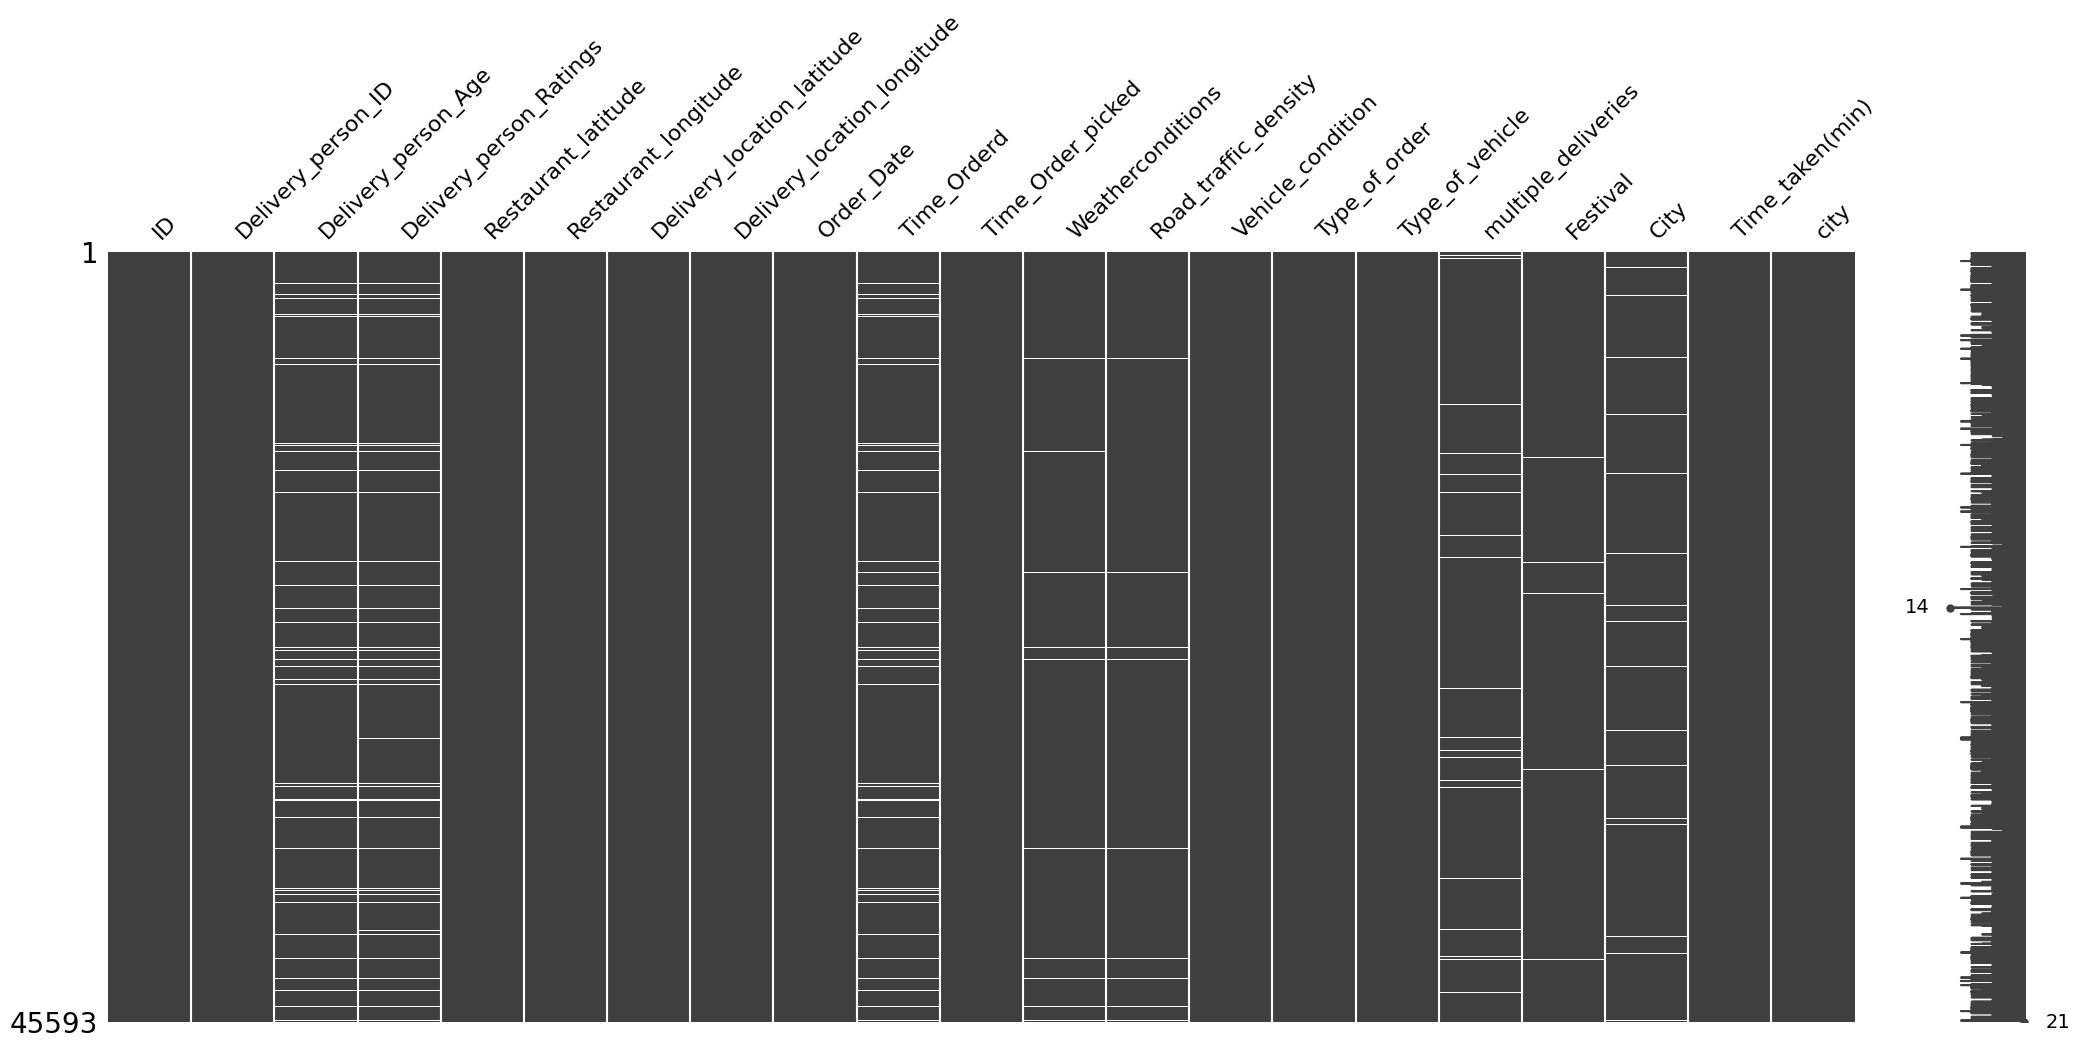

In [98]:
msno.matrix(df)

<Axes: >

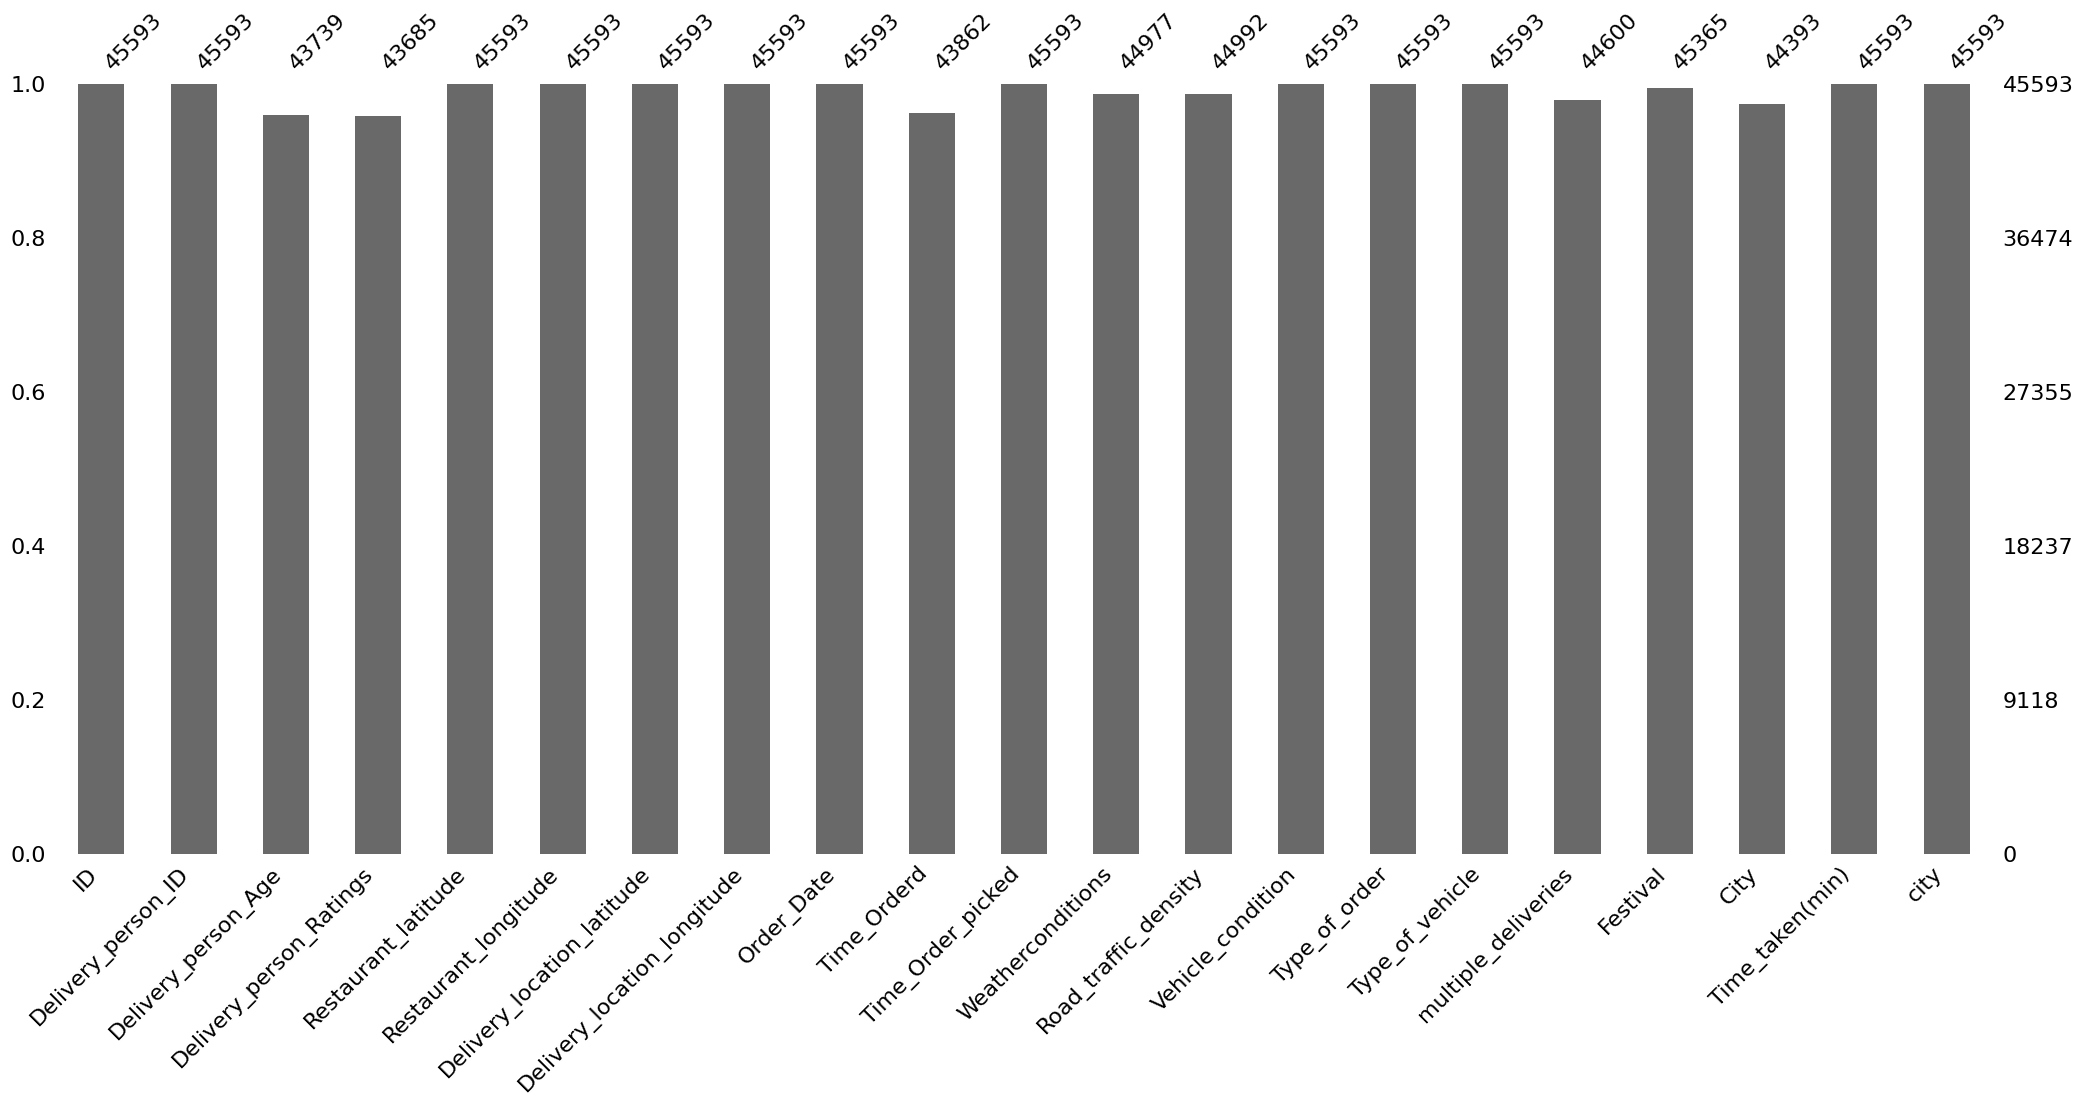

In [99]:
msno.bar(df)

<Axes: >

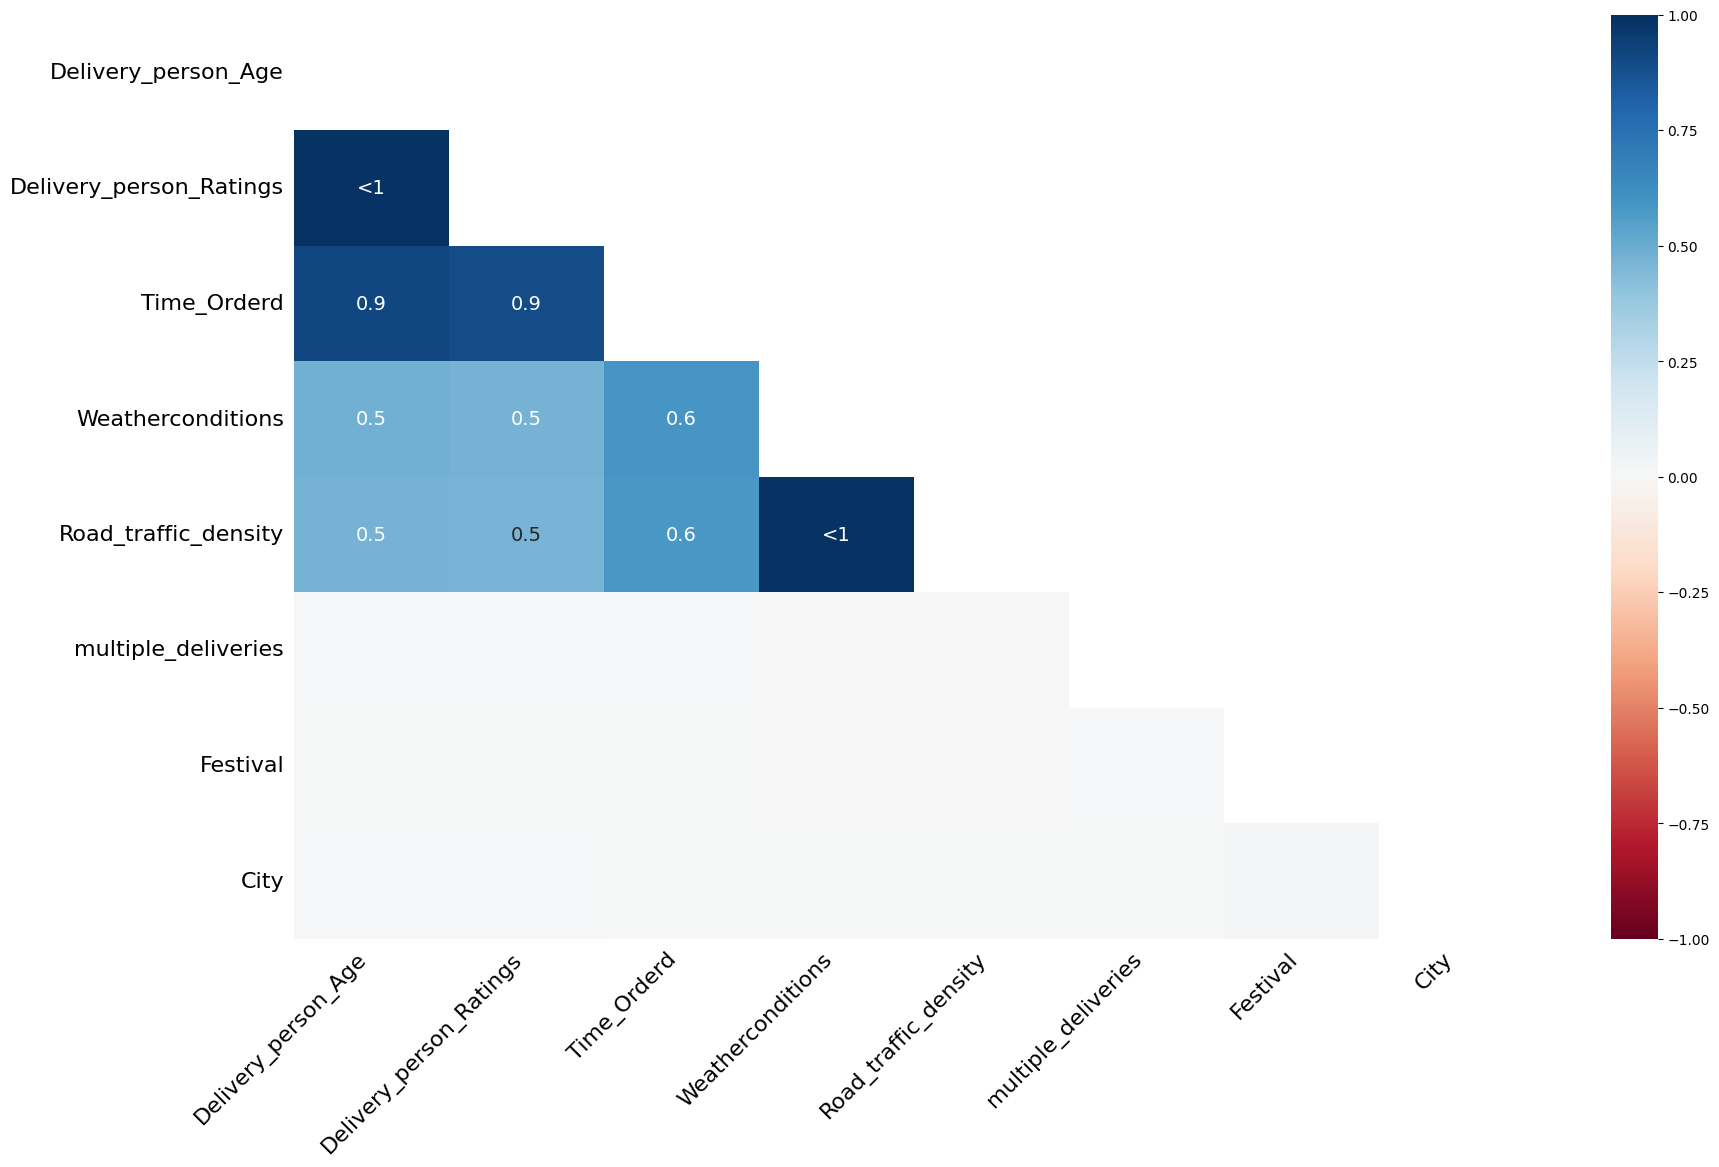

In [100]:
msno.heatmap(df)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [152]:
def change_column_names(data: pd.DataFrame):
  return (
      data.rename(str.lower, axis=1)
      .rename({
          "delivery_person_id":"rider_id",
          "delivery_person_age":"age",
          "delivery_person_ratings":"ratings",
          "delivery_location_latitude":"delivery_latitude",
          "delivery_location_longitude":"delivery_longitude",
          "time_orderd":"order_time",
          "time_order_picked":"order_picked_time",
          "weathercondition":"weather",
          "road_traffic_density":"traffic",
          "city":"city_type",
          "time_taken(min)":"time_taken"},axis=1)
  )

In [153]:
# change column name
df = change_column_names(df)

In [154]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weatherconditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# check fro duplicate rows #

In [105]:
df.drop(columns=["id","rider_id"]).duplicated().sum()

0

In [106]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,...,weatherconditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_type
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,CHEN


# column wise cleaing #

#id


*   there is no dublicated id in this and there is no missing data



In [107]:
print(f"The number of unique IDs are {df['id'].nunique()}")

The number of unique IDs are 45593


# Rider ID #

In [108]:
df['rider_id'].nunique()

1320

In [109]:
df['rider_id'].value_counts()

,count
rider_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
HYDRES04DEL02,66
JAPRES03DEL01,66
VADRES11DEL02,66
...,...
DEHRES18DEL03,7
AURGRES11DEL03,7
KOLRES09DEL03,6


# Age #

In [155]:
df['age'].dtype

dtype('O')

In [156]:
df['age'].astype(float).describe()


,age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


<Axes: ylabel='age'>

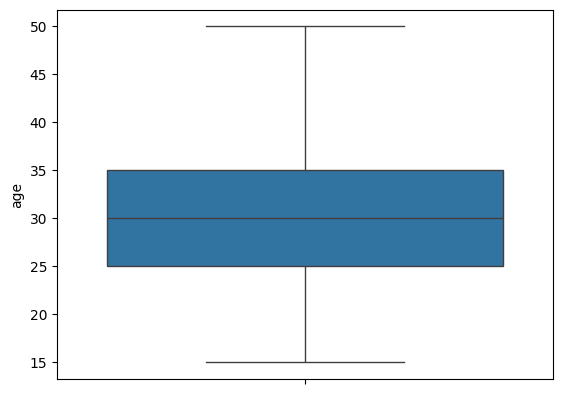

In [157]:
# min age for working is concers so i need to check min value in this data
sns.boxplot(df['age'].astype(float))

In [158]:
# let's fatch the rows which has age less then 18

minors_data = df.loc[df['age'].astype(float) < 18]

In [159]:
minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weatherconditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


In [160]:
#remove minors_data from df
df.drop(minors_data.index, inplace=True)

In [161]:
df.shape

(45555, 20)

In [162]:
df.isna().sum()

,0
id,0
rider_id,0
age,0
ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_latitude,0
delivery_longitude,0
order_date,0
order_time,0


# Rating colunms #

In [163]:
df['ratings'].dtypes

dtype('O')

In [164]:
df['ratings'].astype(float).describe()

,ratings
count,43647.000000
mean,4.636944
std,0.317217
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,6.000000


<Axes: ylabel='ratings'>

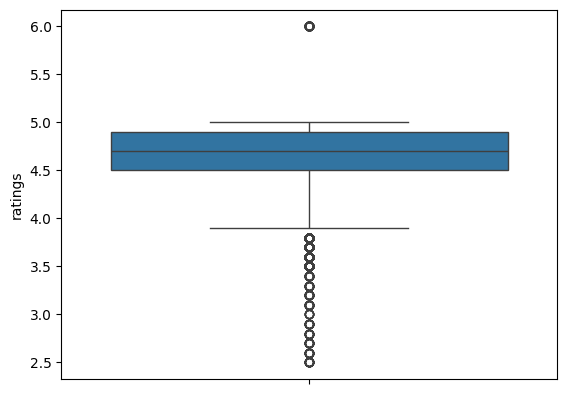

In [165]:
sns.boxplot(df['ratings'].astype(float))

In [166]:
# there is on 6 star ratiing which need to check
six_star_data = df.loc[df['ratings'] == "6"]

In [167]:
six_star_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weatherconditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
6394,0x427,JAPRES06DEL02,50,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20
7031,0x3eb,MYSRES15DEL02,50,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,conditions NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14
7681,0xd42,VADRES09DEL01,50,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22
9499,0x3f0,BANGRES010DEL01,50,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17
9535,0x3ef,RANCHIRES13DEL01,50,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,conditions NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32


In [123]:
df.drop(six_star_data.index, inplace=True)

In [124]:
df.shape

(45502, 21)


# location #

india lies to the north of the equator between 6 degree 44 and 35.30

In [168]:
location = df.columns[4:8].tolist()

In [169]:
location

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [170]:
location_data = df[location]

In [171]:
location_data.head()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982


In [172]:
location_data.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45555.000000,45555.000000,45555.000000,45555.000000
mean,17.027156,70.254716,17.467168,70.845495
std,8.170101,22.811227,7.335566,21.118927
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.551440,75.898497,18.634382,76.002574
75%,22.728163,78.044095,22.785128,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [173]:
lower_bound_lat = 6.44
lower_bound_long = 68.70

In [174]:
location_data.loc[
    (df['restaurant_latitude']< lower_bound_lat) |
    (df['restaurant_longitude']< lower_bound_long) |
    (df['delivery_latitude']< lower_bound_lat) |
    (df['delivery_longitude']< lower_bound_long)
]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [175]:
location_data.loc[
    (location_data['restaurant_latitude'] < lower_bound_lat) |
    (location_data['restaurant_longitude']< lower_bound_long) |
    (location_data['delivery_latitude']< lower_bound_lat) |
    (location_data['delivery_longitude']< lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4058.000000,4058.000000,4058.000000,4058.000000
mean,-2.112734,2.153803,2.175843,8.134878
std,6.497876,25.008093,6.498253,23.767389
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

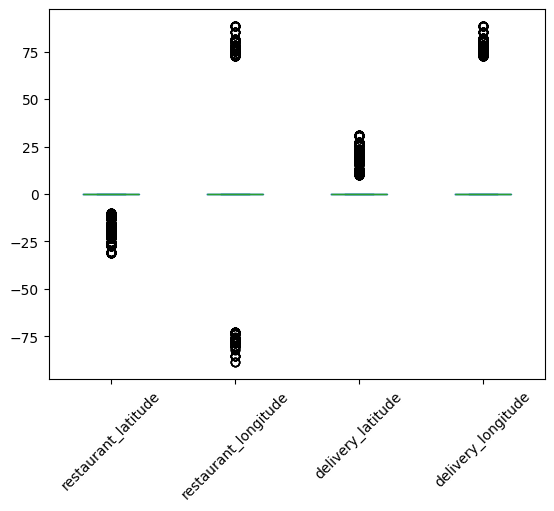

In [176]:
# boxplot for all the anomlies
location_data.loc[
    (location_data['restaurant_latitude'] < lower_bound_lat) |
    (location_data['restaurant_longitude']< lower_bound_long) |
    (location_data['delivery_latitude']< lower_bound_lat) |
    (location_data['delivery_longitude']< lower_bound_long)
].plot(kind = "box")
plt.xticks(rotation = 45)

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

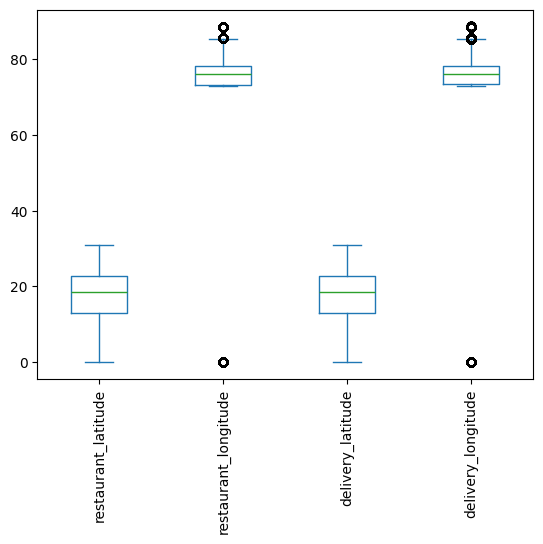

In [177]:
# taking the absolute values
(
    location_data.abs()
    .plot(kind = "box")
)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


In [178]:
# lat long value less then 1
location_data.abs().loc[lambda df_:
                        (df['restaurant_latitude'] < 1) |
                        (df['restaurant_longitude'] < 1) |
                        (df['delivery_latitude'] < 1) |
                        (df['delivery_longitude'] < 1)

]


,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [179]:
def clean_lat_long(data: pd.DataFrame,threshold=1):
  location_columns = location_data.columns.tolist()

  return (
      data
      .assign(**{
          col: (
              np.where(data[col]<threshold, np.nan, data[col].values)
          )
          for col in location_columns
      })
  )


In [180]:
clean_lat_long(df).isna().sum()

,0
id,0
rider_id,0
age,0
ratings,0
restaurant_latitude,4058
restaurant_longitude,3792
delivery_latitude,3637
delivery_longitude,3637
order_date,0
order_time,0


In [181]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser,format='mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [182]:
time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [183]:
(
    time_subset
    .dtypes
)

,0
order_time,object
order_picked_time,object


In [184]:
# calculate the pickup time

(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.NaN).dropna(),format="mixed")
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['order_picked_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","order_picked_time"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


In [185]:
time_subset.columns.tolist()

['order_time', 'order_picked_time']

In [194]:
def data_cleaning(data: pd.DataFrame):
    # Filter out minor riders and six-star rated drivers using the current column names
    minors_data_updated = data.loc[data['age'].astype(float) < 18]
    six_star_data_updated = data.loc[data['ratings'] == "6"]

    return (
        data
        .drop(columns="id")
        .drop(index=minors_data_updated.index)  # Use updated minors_data
        .drop(index=six_star_data_updated.index)  # Use updated six_star_data
        .replace("NaN ", np.NaN)
        .assign(
            # city column out of rider id
            city_name=lambda x: x['rider_id'].str.split("RES").str.get(0),
            # convert age to float
            age=lambda x: x['age'].astype(float),
            # convert ratings to float
            ratings=lambda x: x['ratings'].astype(float),
            # absolute values for location based columns
            restaurant_latitude=lambda x: x['restaurant_latitude'].abs(),
            restaurant_longitude=lambda x: x['restaurant_longitude'].abs(),
            delivery_latitude=lambda x: x['delivery_latitude'].abs(),
            delivery_longitude=lambda x: x['delivery_longitude'].abs(),
            # order date to datetime and feature extraction
            order_date=lambda x: pd.to_datetime(x['order_date'], dayfirst=True),
            order_day=lambda x: x['order_date'].dt.day,
            order_month=lambda x: x['order_date'].dt.month,
            order_day_of_week=lambda x: x['order_date'].dt.day_name().str.lower(),
            is_weekend=lambda x: (x['order_date'].dt.day_name().isin(["Saturday", "Sunday"]).astype(int)),
            # time based columns
            order_time=lambda x: pd.to_datetime(x['order_time'], format='mixed'),
            order_picked_time=lambda x: pd.to_datetime(x['order_picked_time'], format='mixed'),
            # time taken to pick order
            pickup_time_minutes=lambda x: ((x['order_picked_time'] - x['order_time']).dt.seconds / 60),
            # hour in which order was placed
            order_time_hour=lambda x: x['order_time'].dt.hour,
            # time of the day when order was placed
            order_time_of_day=lambda x: (x['order_time_hour'].pipe(time_of_day)),
            # categorical columns
            weather=lambda x: (x['weatherconditions'].str.replace("conditions ", "").str.lower().replace("nan", np.NaN)),
            traffic=lambda x: x["traffic"].str.rstrip().str.lower(),
            type_of_order=lambda x: x['type_of_order'].str.rstrip().str.lower(),
            type_of_vehicle=lambda x: x['type_of_vehicle'].str.rstrip().str.lower(),
            festival=lambda x: x['festival'].str.rstrip().str.lower(),
            city_type=lambda x: x['city_type'].str.rstrip().str.lower(),
            # multiple deliveries column
            multiple_deliveries = lambda x: x['multiple_deliveries'].astype(float),
            # target column modifications
            time_taken = lambda x: (x['time_taken']
                                    .str.replace("(min) ","")
                                    .astype(int)))
        .drop(columns=["order_time","order_picked_time"])
    )

In [195]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weatherconditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [196]:
data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weatherconditions,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,weather
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,conditions Sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,sunny
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,conditions Stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,stormy
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,conditions Sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,sandstorms
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,conditions Sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,sunny
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,conditions Cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,conditions Windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,windy
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,conditions Windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,windy
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,conditions Cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,cloudy
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,conditions Cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,cloudy


In [197]:
df.isna().sum()

,0
id,0
rider_id,0
age,0
ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_latitude,0
delivery_longitude,0
order_date,0
order_time,0


In [198]:
df.shape

(45555, 20)

In [200]:
location_data.columns.tolist()

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [204]:
def calculate_haversine_distance(df):
    location_columns = location_data.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [205]:
# add more data cleaning steps

cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weatherconditions,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,weather,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,conditions Sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,sunny,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,conditions Stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,stormy,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,conditions Sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,sandstorms,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,conditions Sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,sunny,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,conditions Cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,cloudy,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,conditions Windy,high,...,JAP,24,3,thursday,0,10.0,11.0,morning,windy,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,conditions Windy,jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,windy,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,conditions Cloudy,low,...,CHEN,11,3,friday,0,15.0,23.0,night,cloudy,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,conditions Cloudy,high,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,cloudy,6.232393


# Save Cleaned Data #

In [206]:
cleaned_data.to_csv("/content/drive/MyDrive/A/Swiggy/cleaned_data.csv",index=False)

In [207]:
# load the cleaned data
cleaned_data = pd.read_csv("/content/drive/MyDrive/A/Swiggy/cleaned_data.csv")

In [208]:
cleaned_data.dtypes

,0
rider_id,object
age,float64
ratings,float64
restaurant_latitude,float64
restaurant_longitude,float64
delivery_latitude,float64
delivery_longitude,float64
order_date,object
weatherconditions,object
traffic,object


In [209]:
cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weatherconditions,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,weather,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,conditions Sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,sunny,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,conditions Stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,stormy,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,conditions Sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,sandstorms,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,conditions Sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,sunny,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,conditions Cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,cloudy,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,conditions Windy,high,...,JAP,24,3,thursday,0,10.0,11.0,morning,windy,1.489846
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,conditions Windy,jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,windy,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,conditions Cloudy,low,...,CHEN,11,3,friday,0,15.0,23.0,night,cloudy,4.657195
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,conditions Cloudy,high,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,cloudy,6.232393


In [210]:
# DROP weatherconditions COLUNM
cleaned_data.drop(columns=["weatherconditions"],inplace=True)

In [211]:
# save to drive
cleaned_data.to_csv("/content/drive/MyDrive/A/Swiggy/cleaned_data.csv",index=False)

In [212]:
# load the cleaned data
cleaned_data1 = pd.read_csv("/content/drive/MyDrive/A/Swiggy/cleaned_data.csv")

In [215]:
cleaned_data1

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,traffic,vehicle_condition,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,weather,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,high,2,...,INDO,19,3,saturday,1,15.0,11.0,morning,sunny,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,jam,2,...,BANG,25,3,friday,0,5.0,19.0,evening,stormy,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,low,0,...,BANG,19,3,saturday,1,15.0,8.0,morning,sandstorms,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,medium,0,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,sunny,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,high,1,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,cloudy,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,high,1,...,JAP,24,3,thursday,0,10.0,11.0,morning,windy,1.489846
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,jam,0,...,AGR,16,2,wednesday,0,15.0,19.0,evening,windy,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,low,1,...,CHEN,11,3,friday,0,15.0,23.0,night,cloudy,4.657195
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,high,0,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,cloudy,6.232393
